In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
max_col= pd.set_option('display.max_columns', None)
max_row= pd.set_option('display.max_rows', None)

df= pd.read_csv('nba_salary_stats.csv')
df.head()

In [ ]:
max_col= pd.set_option('display.max_columns', None)

In [ ]:
df.isna().sum()

,0
first_name,0
last_name,0
team,0
salary,0
pos,0
age,0
g,0
gs,0
mp,0
fg,0


In [ ]:
df_numerics = df.copy()

del df_numerics['first_name']
del df_numerics['last_name']
del df_numerics['team']
del df_numerics['pos']
df_numerics.tail()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
284,2239200.0,25,50,0,459,37,98,0.378,21,70,0.300,16,28,0.571,0.485,15,18,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,0.390,309,542,0.570,0.576,207,332,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,0.379,78,153,0.510,0.535,54,63,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,0.091,129,236,0.547,0.528,38,61,0.623,85,209,294,49,17,20,41,84,299
288,2389641.0,29,27,0,355,51,90,0.567,0,4,0.000,51,86,0.593,0.567,38,49,0.776,50,75,125,22,8,6,19,56,140


In [ ]:
df.dtypes

,0
first_name,object
last_name,object
team,object
salary,float64
pos,object
age,int64
g,int64
gs,int64
mp,int64
fg,int64


In [ ]:
# Replacing of signs
def clean_currency(x):
  if isinstance(x, str):
    return(x.replace('$', ").replace(',', "))
  return(x)

In [ ]:
df_numerics['salary'] = df_numerics['salary'].apply(clean_currency).astype('float')
df_numerics.sample(3)

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
52,8604651.0,27,41,18,1147,102,256,0.398,42,126,0.333,60,130,0.462,0.480,58,73,0.795,33,115,148,165,71,15,57,106,304
171,1669178.0,25,62,3,902,88,200,0.440,27,85,0.318,61,115,0.530,0.508,30,40,0.750,22,72,94,180,57,10,38,54,233
191,3300000.0,28,76,7,1736,246,563,0.437,156,387,0.403,90,176,0.511,0.575,52,59,0.881,25,178,203,102,30,13,59,190,700


In [ ]:
df_numerics.describe()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,3p%,2p,2pa,2p%,efg%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000
mean,8.972877e+06,25.768166,56.619377,30.415225,1373.657439,237.546713,514.283737,0.458730,74.276817,208.335640,0.329626,163.269896,305.948097,0.527087,0.529311,97.934256,125.660900,0.758394,55.598616,194.788927,250.387543,140.802768,44.529412,26.709343,75.211073,110.83045,647.304498
std,1.008679e+07,4.378557,18.081042,26.947104,698.833132,164.543135,347.674340,0.072096,63.139612,166.382283,0.093922,132.330958,242.085400,0.077674,0.061117,95.427324,117.650093,0.109234,49.172226,138.198229,177.846596,126.966637,28.249385,24.822116,58.024125,58.04586,455.553247
min,5.318000e+03,19.000000,9.000000,0.000000,35.000000,3.000000,13.000000,0.231000,0.000000,1.000000,0.000000,2.000000,9.000000,0.222000,0.269000,2.000000,4.000000,0.333000,2.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,4.00000,12.000000
25%,2.033160e+06,22.000000,47.000000,5.000000,799.000000,110.000000,247.000000,0.411000,21.000000,70.000000,0.304000,65.000000,127.000000,0.479000,0.493000,35.000000,49.000000,0.700000,22.000000,97.000000,125.000000,51.000000,25.000000,10.000000,38.000000,68.00000,299.000000
50%,4.259259e+06,25.000000,62.000000,21.000000,1406.000000,212.000000,465.000000,0.451000,57.000000,169.000000,0.342000,129.000000,236.000000,0.529000,0.533000,72.000000,93.000000,0.770000,39.000000,174.000000,217.000000,99.000000,41.000000,19.000000,57.000000,106.00000,588.000000
75%,1.242000e+07,29.000000,70.000000,57.000000,1931.000000,324.000000,723.000000,0.496000,115.000000,320.000000,0.377000,218.000000,411.000000,0.573000,0.566000,130.000000,167.000000,0.838000,73.000000,252.000000,334.000000,188.000000,62.000000,35.000000,100.000000,155.00000,892.000000
max,4.578097e+07,38.000000,82.000000,80.000000,2743.000000,774.000000,1564.000000,0.693000,285.000000,750.000000,1.000000,724.000000,1393.000000,0.754000,0.693000,654.000000,803.000000,1.000000,279.000000,813.000000,1019.000000,702.000000,138.000000,177.000000,292.000000,286.00000,2118.000000


In [ ]:

df_numerics.shape

(289, 27)

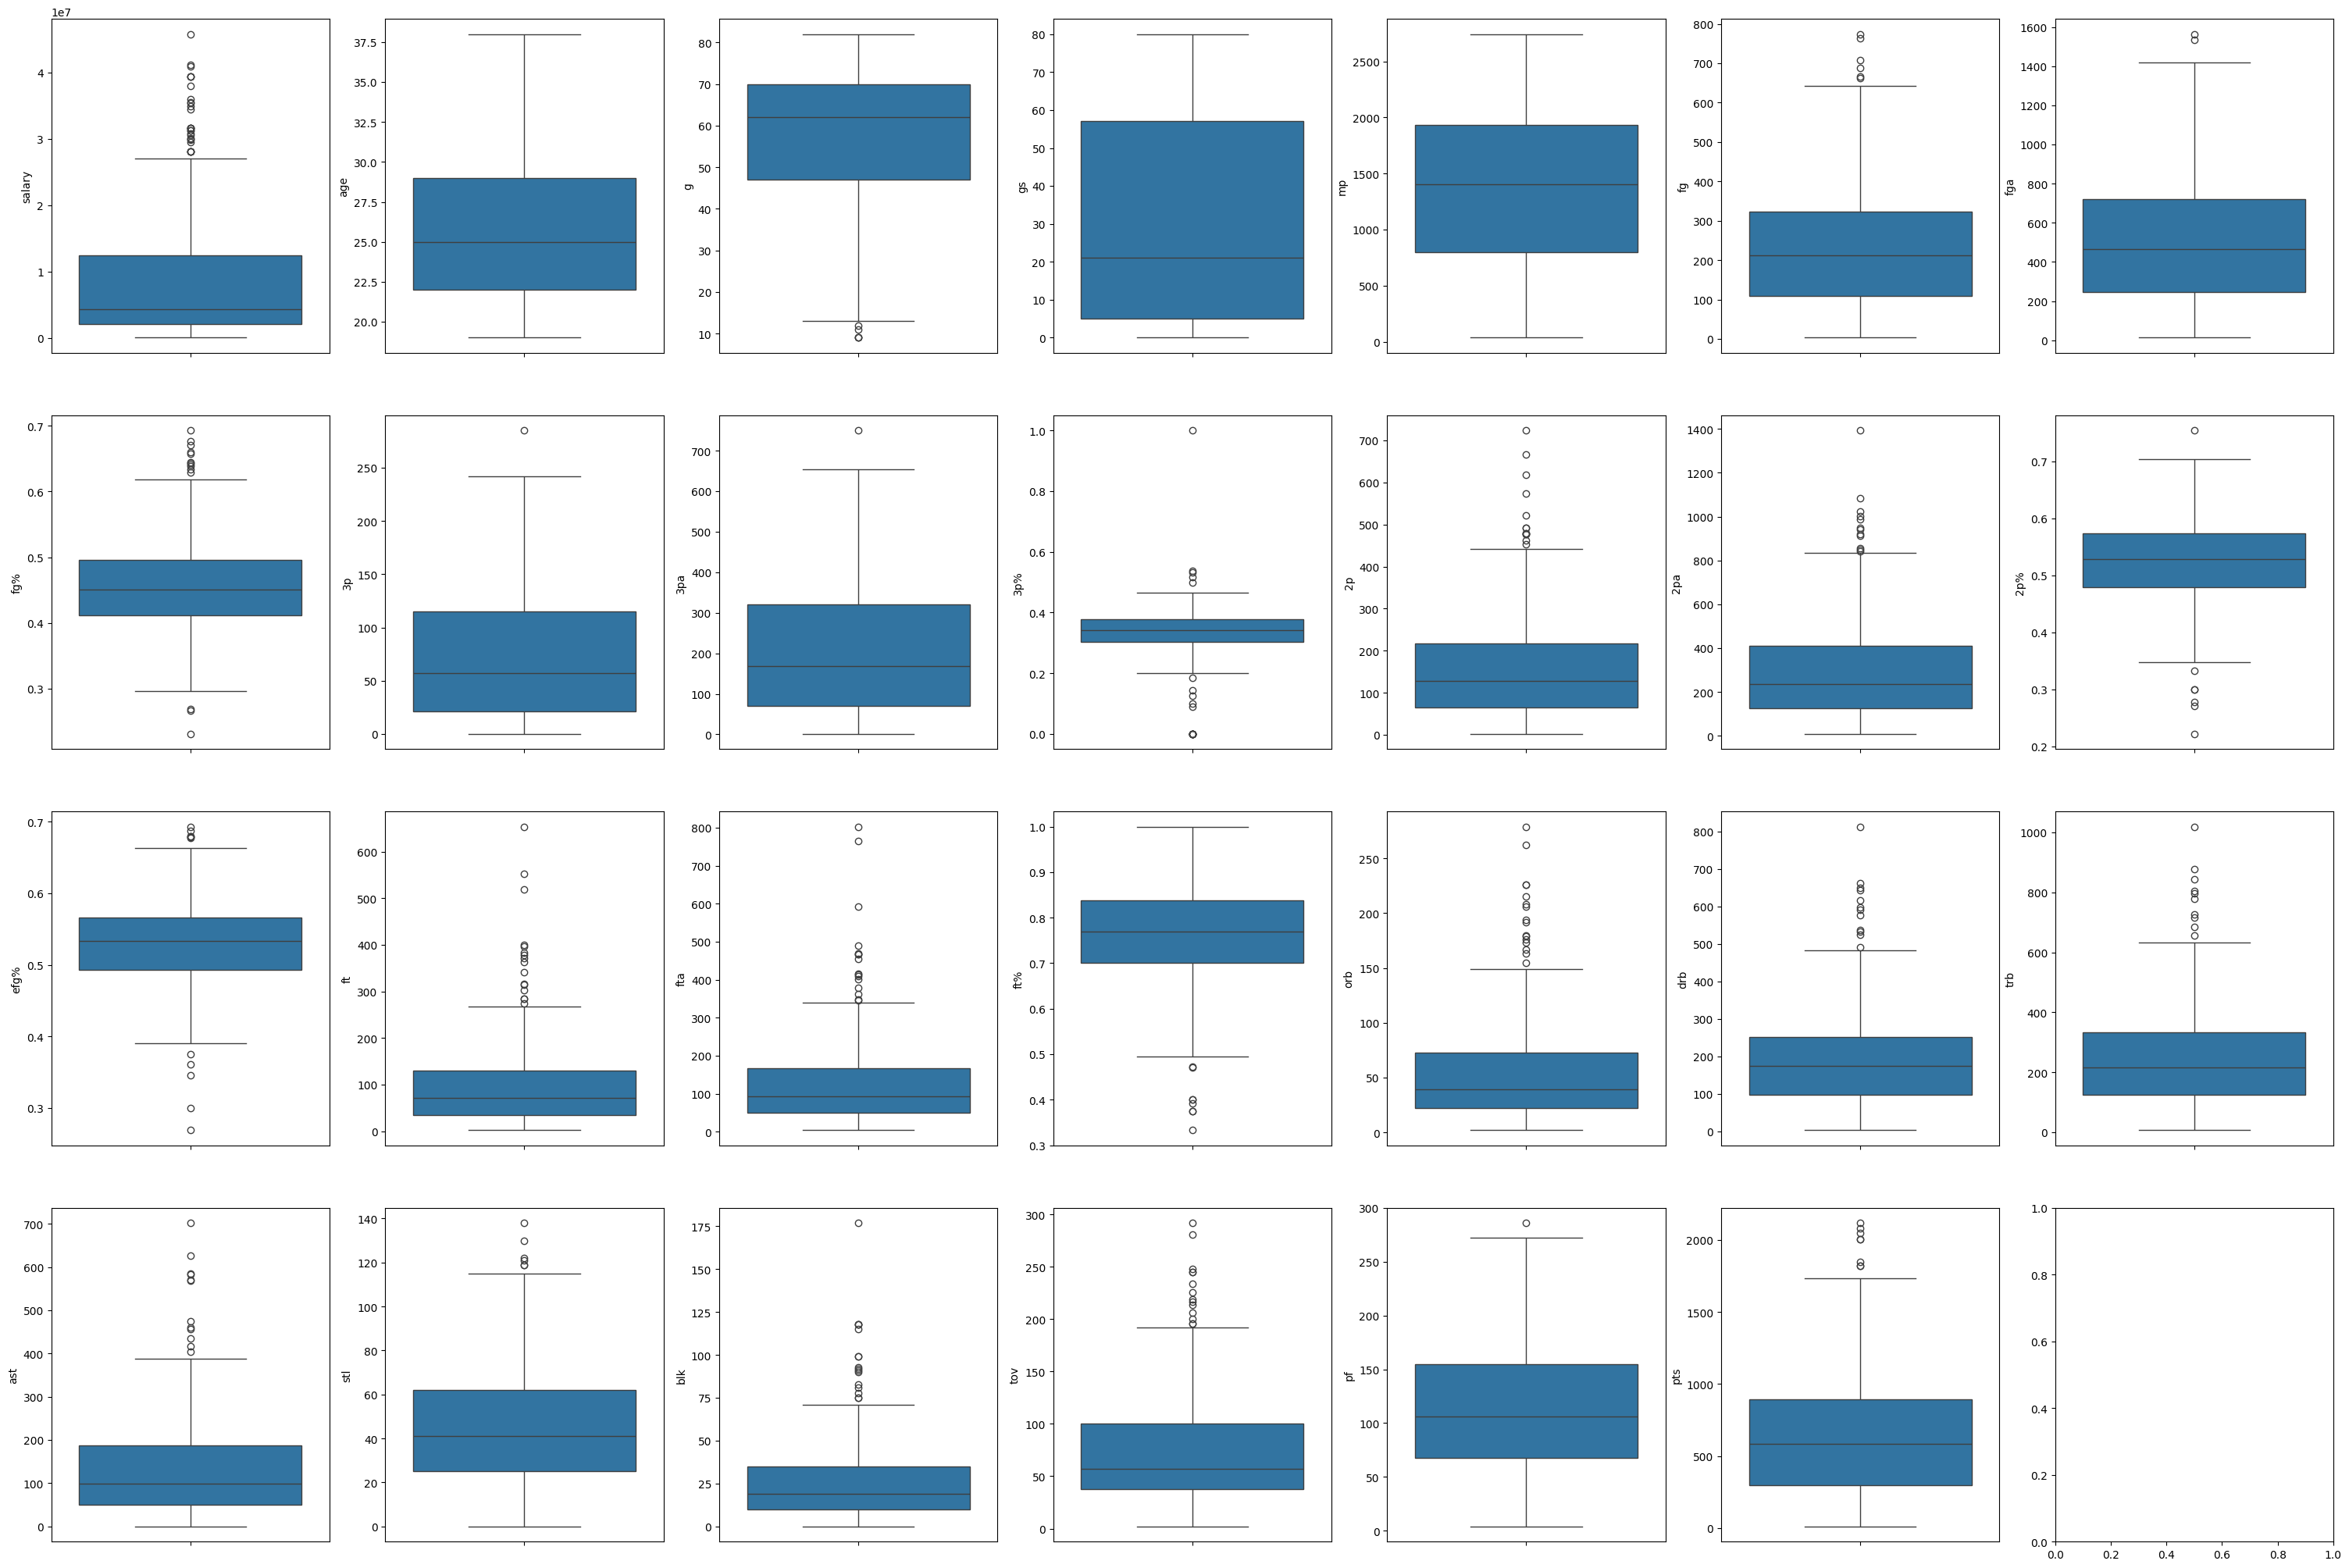

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
# Flatten the axs array to iterate through it with a single index
axs = axs.flatten()
index=0
for k, v in df_numerics.items():
  sns.boxplot(y=k, data=df_numerics,ax=axs[index])
  index +=1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

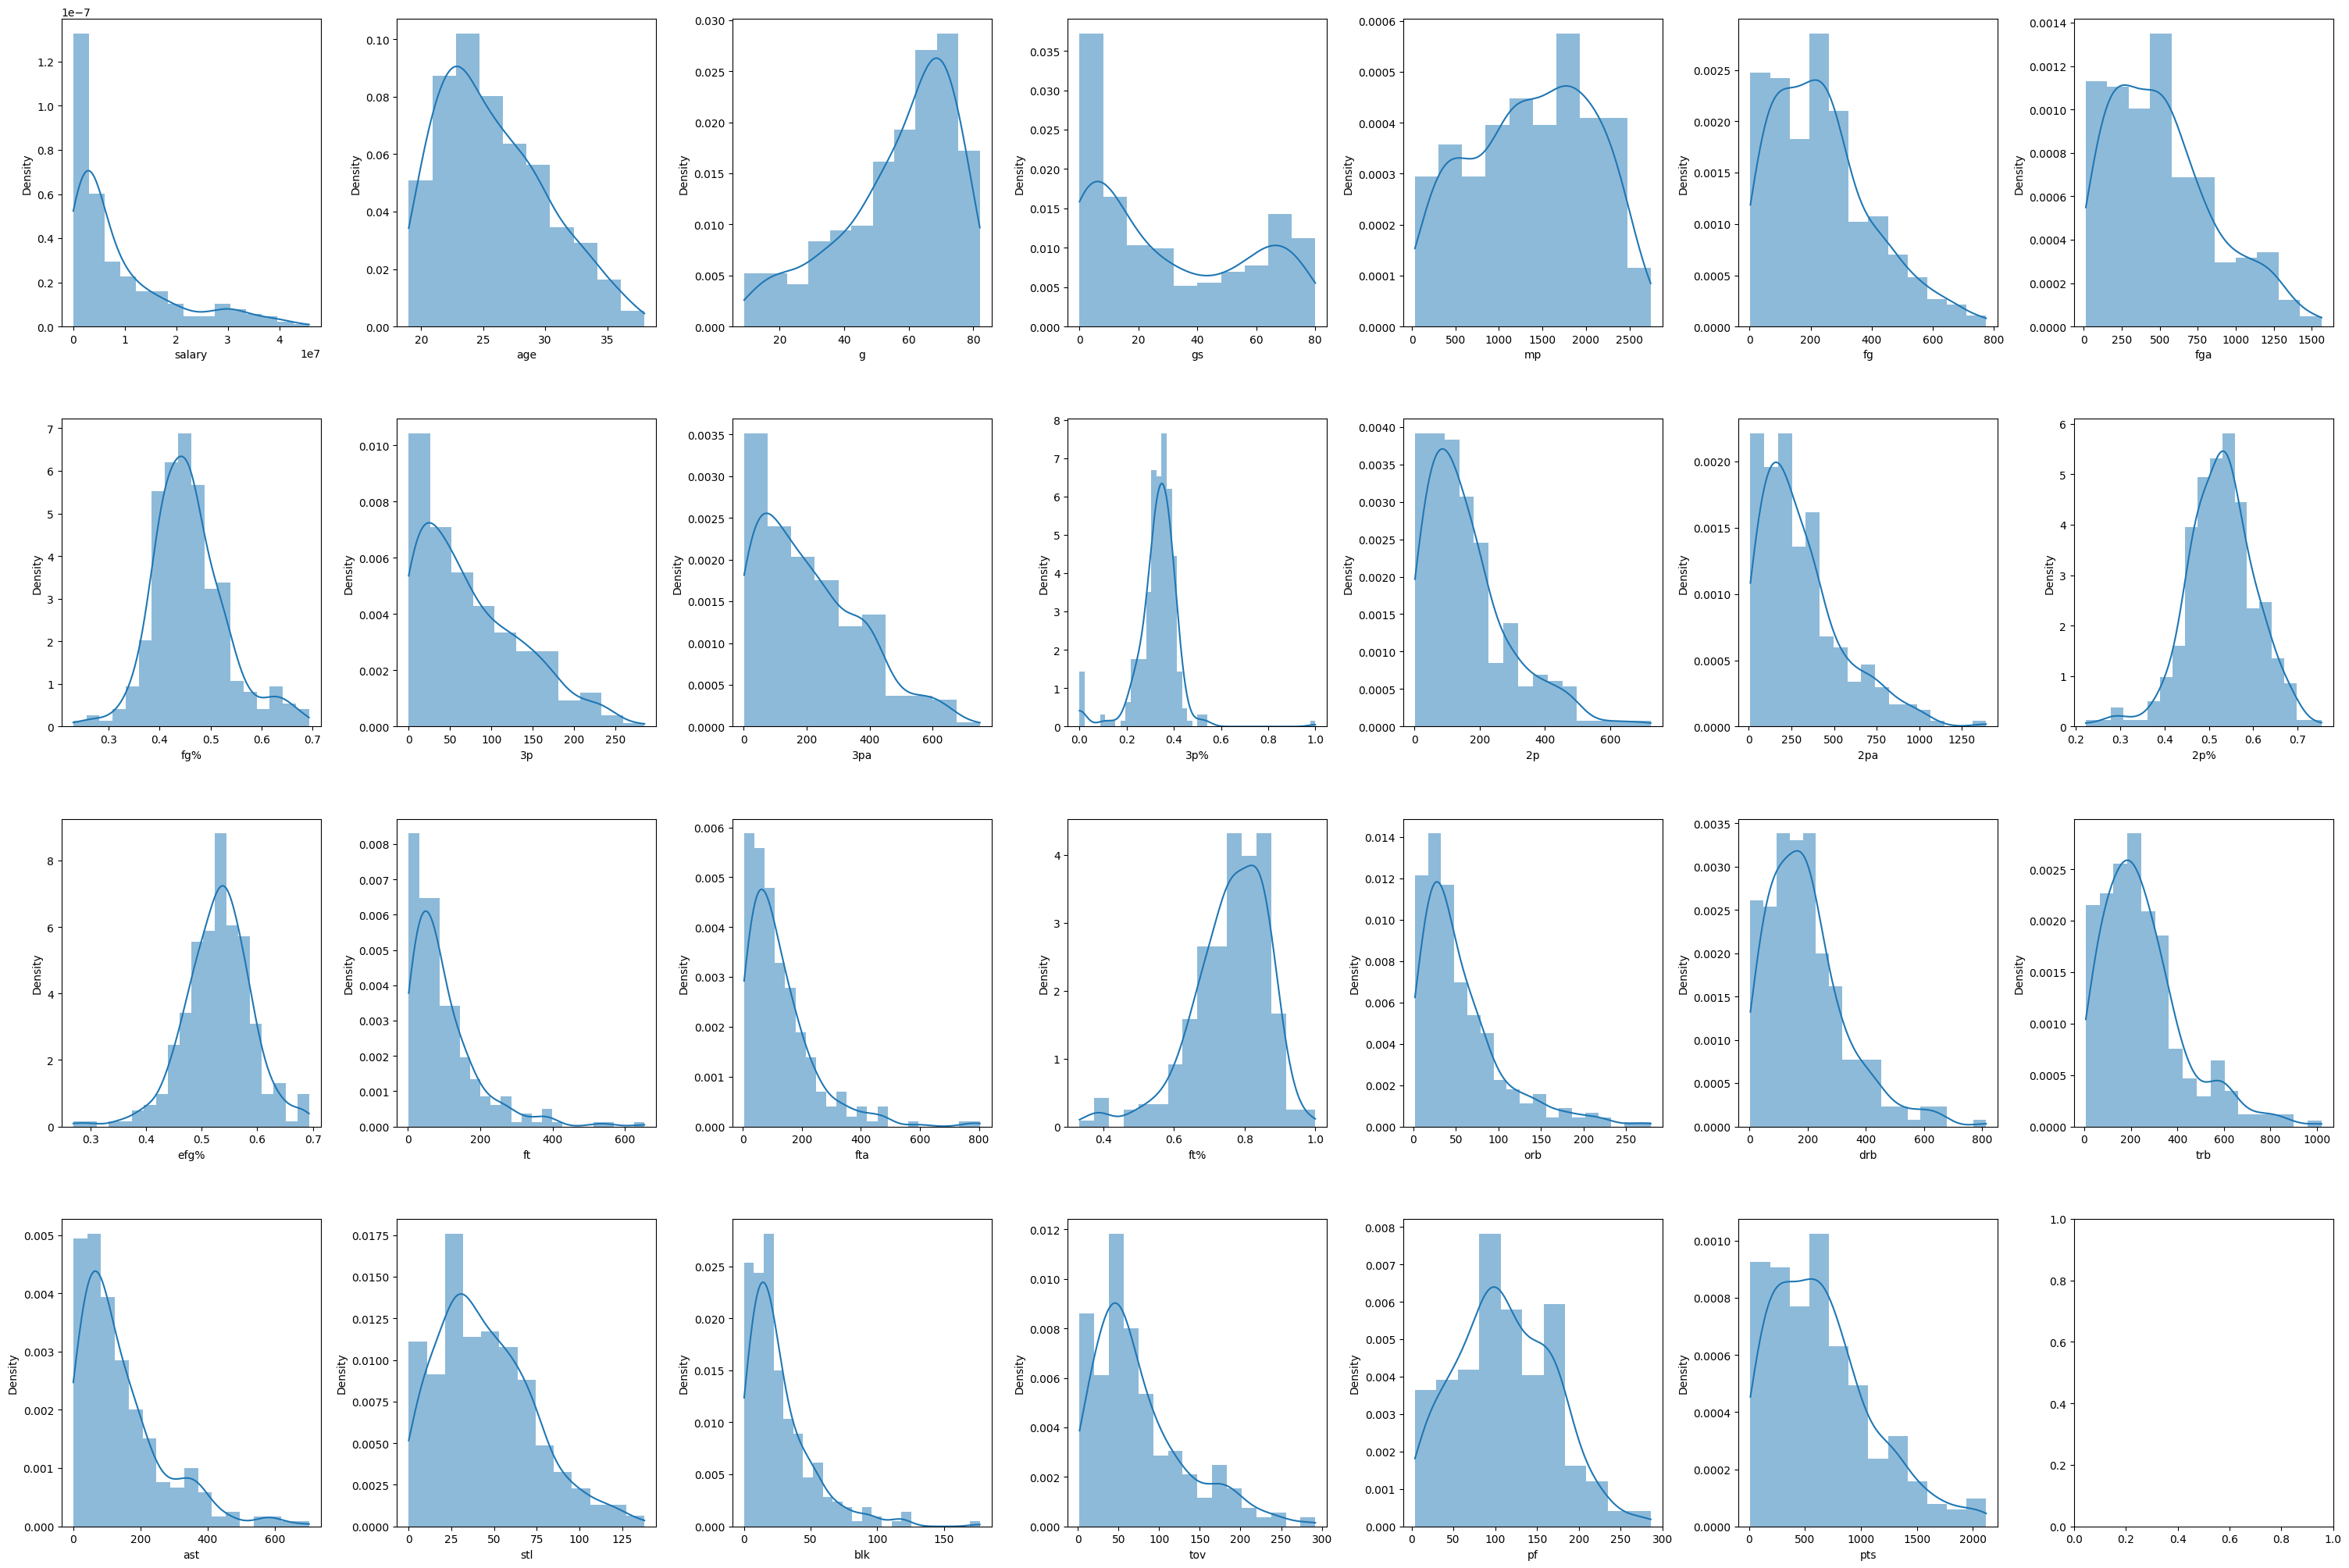

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
# Flatten the axs array to iterate through it with a single index
axs = axs.flatten()
index=0
for k, v in df_numerics.items():
  sns.histplot(v, ax=axs[index], kde=True, stat ='density', linewidth=0)
  index +=1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

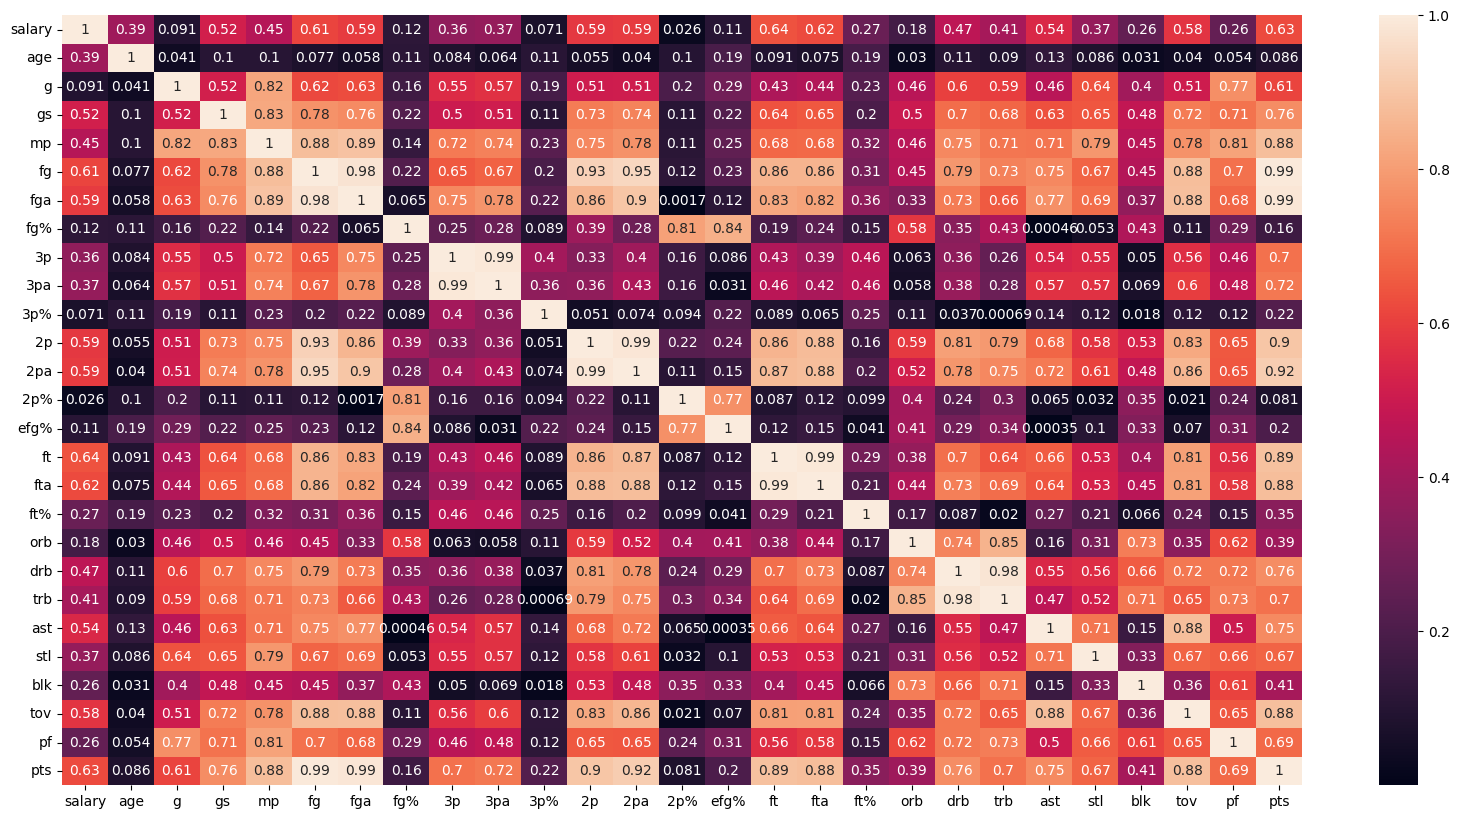

In [ ]:
#determining the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_numerics.corr().abs(), annot= True)

In [ ]:
for k, v in df_numerics.items():
  q1 =v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr =q3-q1
  v_col = v[(v <= q1 - 1.5*iqr)|(v >= q3 + 1.5*iqr)]
  percent = np.shape(v_col)[0] * 100 / np.shape(df_numerics)[0]
  print('%s outliers = %.2f%%' % (k, percent))

salary outliers = 9.69%
age outliers = 0.00%
g outliers = 1.73%
gs outliers = 0.00%
mp outliers = 0.00%
fg outliers = 2.08%
fga outliers = 0.69%
fg% outliers = 4.84%
3p outliers = 0.35%
3pa outliers = 0.35%
3p% outliers = 6.57%
2p outliers = 4.50%
2pa outliers = 4.15%
2p% outliers = 2.42%
efg% outliers = 3.81%
ft outliers = 5.54%
fta outliers = 5.54%
ft% outliers = 2.77%
orb outliers = 5.54%
drb outliers = 4.15%
trb outliers = 3.46%
ast outliers = 4.15%
stl outliers = 2.08%
blk outliers = 5.54%
tov outliers = 4.84%
pf outliers = 0.35%
pts outliers = 2.77%


In [ ]:
# Normalizing & One Hot Encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#ct = make_column_transformer(
#    (MinMaxScaler(), ['age', 'pts']),
#   (OneHotEncoder(sparse='ignore'), ['pos', 'team', 'region'])
#)

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'pts']),
)

In [ ]:
#Separate Feature & label

x= df.drop('salary', axis=1)
y =df['salary']

In [ ]:
# separate training and testing data
#Train 80%, test 20%

from sklearn.model_selection import train_test_split # Import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,
                                                    random_state=66)

In [ ]:
# Transform Training & Testing Data
ct.fit(x_train)
#x_train_normal = ct.fit_transform(x_train)
#x_test_normal = ct.fit_transform(x_test)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
print(x_train_normal, '\t', x_test_normal)

[[0.22222222 0.07787274]
 [0.44444444 0.68138651]
 [0.5        0.43494777]
 [0.88888889 0.16239316]
 [0.33333333 0.33665717]
 [0.22222222 0.36989554]
 [0.11111111 0.30151947]
 [0.11111111 0.4985755 ]
 [0.66666667 0.15859449]
 [0.38888889 0.49382716]
 [0.05555556 0.26495726]
 [0.16666667 0.6011396 ]
 [0.16666667 0.29534663]
 [0.33333333 0.27492877]
 [0.11111111 0.27350427]
 [0.55555556 0.18566002]
 [0.55555556 0.5954416 ]
 [0.16666667 0.2374169 ]
 [0.33333333 0.10493827]
 [0.16666667 0.31671415]
 [0.05555556 0.06695157]
 [0.16666667 0.66144349]
 [0.33333333 0.85944919]
 [0.16666667 0.00237417]
 [0.33333333 0.44681861]
 [0.38888889 0.44301994]
 [0.44444444 0.62108262]
 [0.44444444 0.73076923]
 [0.27777778 0.41025641]
 [0.77777778 0.24738841]
 [0.55555556 0.52849003]
 [0.83333333 0.16809117]
 [0.77777778 0.4325736 ]
 [0.44444444 0.4031339 ]
 [0.55555556 0.59496676]
 [0.22222222 0.15099715]
 [0.55555556 0.32051282]
 [0.22222222 0.0365622 ]
 [0.05555556 0.01899335]
 [0.16666667 0.24453941]


In [ ]:
#Building Neural with training data

tf.random.set_seed(66)

nba_model =tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
nba_model.compile(loss = tf.keras.losses.mae,
                  optimizer =tf.keras.optimizers.Adam(learning_rate=0.01), #learning_rate =0.01
                  metrics =['mae'])

fit_data = nba_model.fit(x_train_normal, y_train, epochs=100, verbose =0)
nba_model_loss, nba_model_mae = nba_model.evaluate(x_test_normal, y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4369353.5000 - mae: 4369353.5000 


<Axes: ylabel='epoch'>

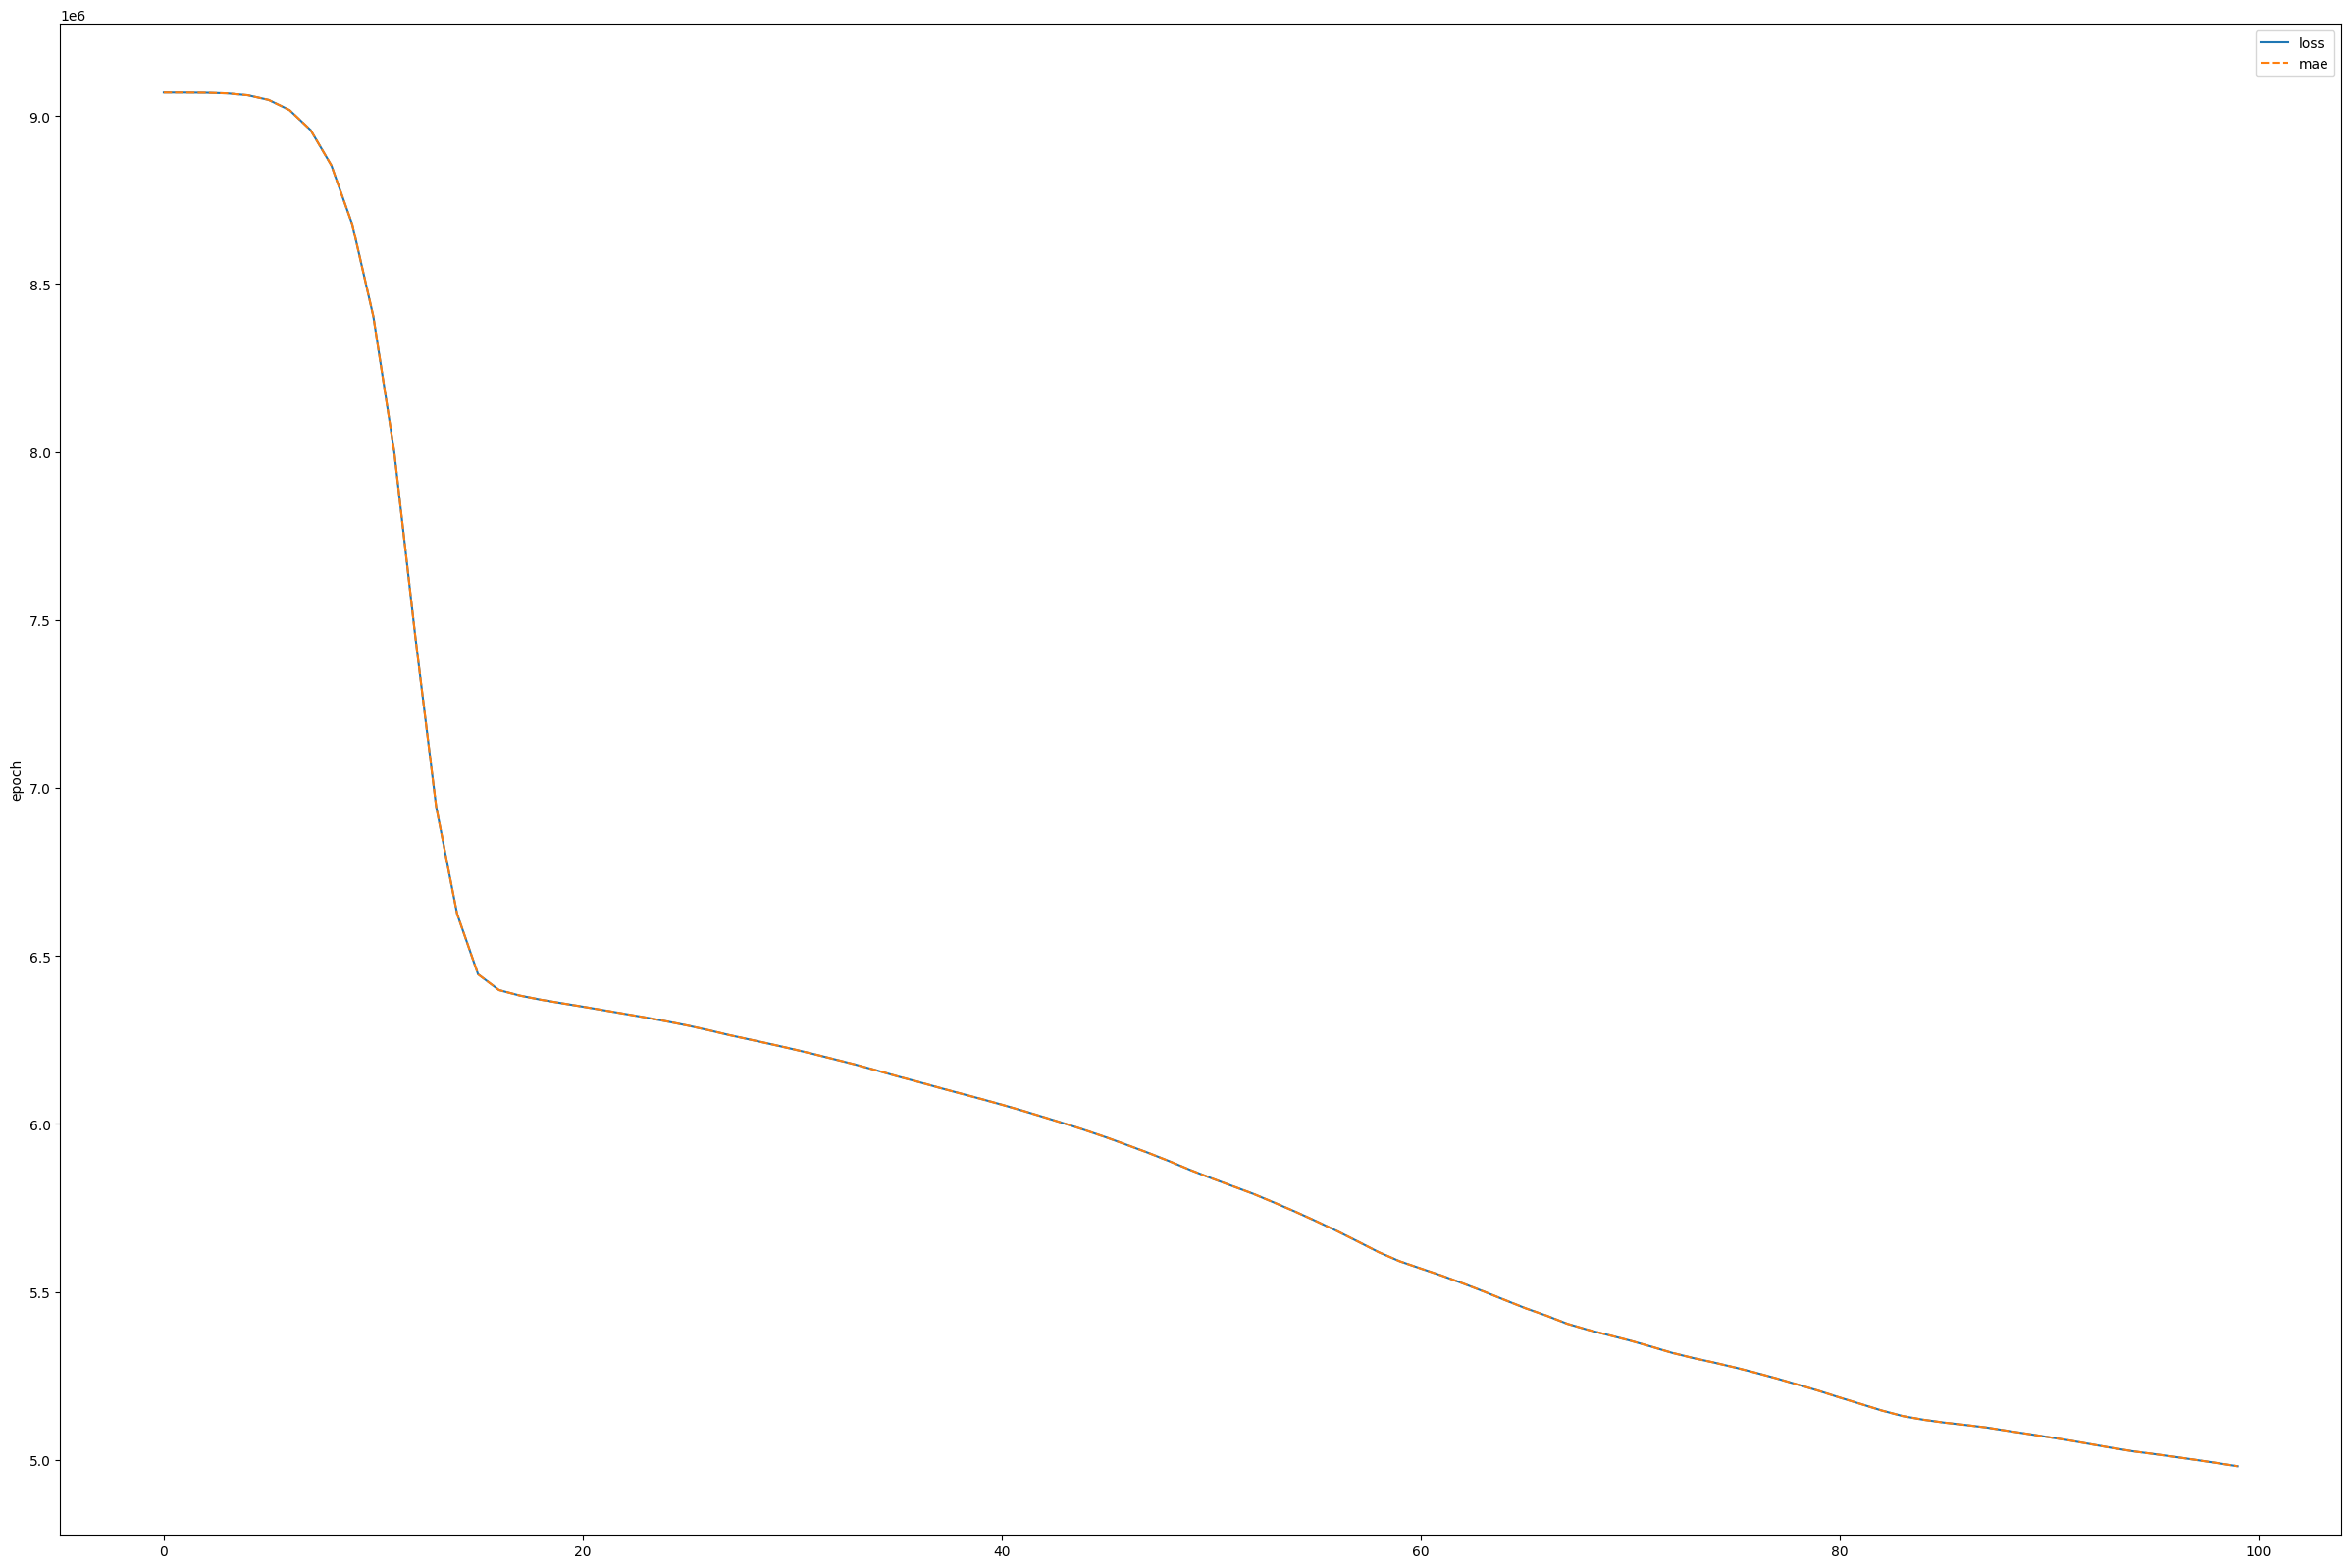

In [ ]:
# plot
plt.figure(figsize =(30,20))
plt.ylabel('Loss')
plt.ylabel('epoch')
sns.lineplot(data = fit_data.history)